In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sprinter

In [61]:
qfib_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_TCK_v2/'
qfib_ext = '.tck'
dpy_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_TCK_v2/'
dpy_ext = '.tck'
tko_dir = '/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/'
tko_ext = '.vtk'

files = []#['CA', 'CC', 'CP']
for f in os.listdir(tko_dir):
    if f.endswith('vtk'):
        files.append(f.split('.')[0])
        
files = files[0:2]

input_size = 0
for f in files:
    print(os.path.join(tko_dir, f+tko_ext), os.path.getsize(os.path.join(tko_dir, f+tko_ext)))
    input_size += os.path.getsize(os.path.join(tko_dir, f+tko_ext))
input_size /= float(len(files))

qfib_files = [(qfib_dir, f+qfib_ext) for f in files]
qfib_bits = [8, 16]
tko_files = [(tko_dir, f+tko_ext) for f in files]
tko_bits = [6,7,8,9,10,11,12,13,14]
dpy_files =  [(dpy_dir, f+dpy_ext) for f in files]


/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/OR_right.vtk 17275391
/home/d/Dropbox/TRAKODATA/ISMRM2015/ISMRM_2015_Tracto_challenge_ground_truth_bundles_VTK_v2/MCP.vtk 50988755


In [4]:
files

['OR_right', 'MCP']

In [5]:
dpy_sizes, dpy_errors, dpy_stds = sprinter.Sprinter.run_dpy(qfib_files)

[6.101470470428467, 26.89264464378357, (10438495, 10232968, 1.9689332609729604, 1.0200847886947364), (0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0)]
0.0 0.0
[12.920686960220337, 116.29215860366821, (30745207, 28832832, 6.22007521367477, 1.0663262977427954), (0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0)]
0.0 0.0


In [6]:
qfib_sizes, qfib_errors, qfib_stds = sprinter.Sprinter.run_qfib(qfib_files, qfib_bits)

In [7]:
qfib_sizes

[2075919.0, 3744953.0]

In [8]:
qfib_errors

[15.089823722839355, 15.092788696289062]

In [9]:
runs = {}

In [99]:
config = {
    'name': 'default'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, [14])
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

In [101]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbponly{bits}'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [102]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

In [82]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':10,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi{bits}_binary'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=True)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/python3.6/site-packages/vtk-8.1.2-py3.6-linux-x86_64.egg/vtk/util/numpy_support.py:137: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/home/d/miniconda3/envs/TRAKODEV/lib/pyt

In [103]:
config = {
    'POSITION': {
        'position':True,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':0,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'INDICES': {
        'position':False,
        'sequential':True,
        'quantization_bits':None,
        'compression_level':0,
        'quantization_range':-1,
        'quantization_origin':None
    },
    'name': 'qbi_CL0_{bits}'
}
tko_sizes, tko_errors, tko_stds = sprinter.Sprinter.run_trako(config, tko_files, tko_bits, binary=False)
runs[config['name']] = [tko_sizes, tko_errors, tko_stds]

In [104]:
runs

{'default': [[7432218.0], [0.002448278828524053], [0.0007026525854598731]],
 'qbponly{bits}': [[1185454.5,
   1748464.5,
   2451654.5,
   3218190.0,
   4015994.0,
   4847454.0,
   5688964.0,
   6539630.0,
   7399334.0],
  [0.6367701292037964,
   0.3156381845474243,
   0.15729046612977982,
   0.07849997654557228,
   0.0391908660531044,
   0.019593361765146255,
   0.009790888521820307,
   0.00489619979634881,
   0.002448278828524053],
  [0.18304312974214554,
   0.09088501334190369,
   0.04518036171793938,
   0.022538193501532078,
   0.01126435399055481,
   0.005623846314847469,
   0.0028141788206994534,
   0.0014058368979021907,
   0.0007026525854598731]],
 'qbi{bits}': [[1179132.5,
   962999.0,
   2450174.5,
   3217922.0,
   4015794.0,
   4847078.0,
   5688202.0,
   6539448.0,
   7399410.0],
  [11.905920499764255,
   0.28681516647338867,
   0.15729046612977982,
   0.07849997654557228,
   0.0391908660531044,
   0.019593361765146255,
   0.009790888521820307,
   0.00489619979634881,
   0.0

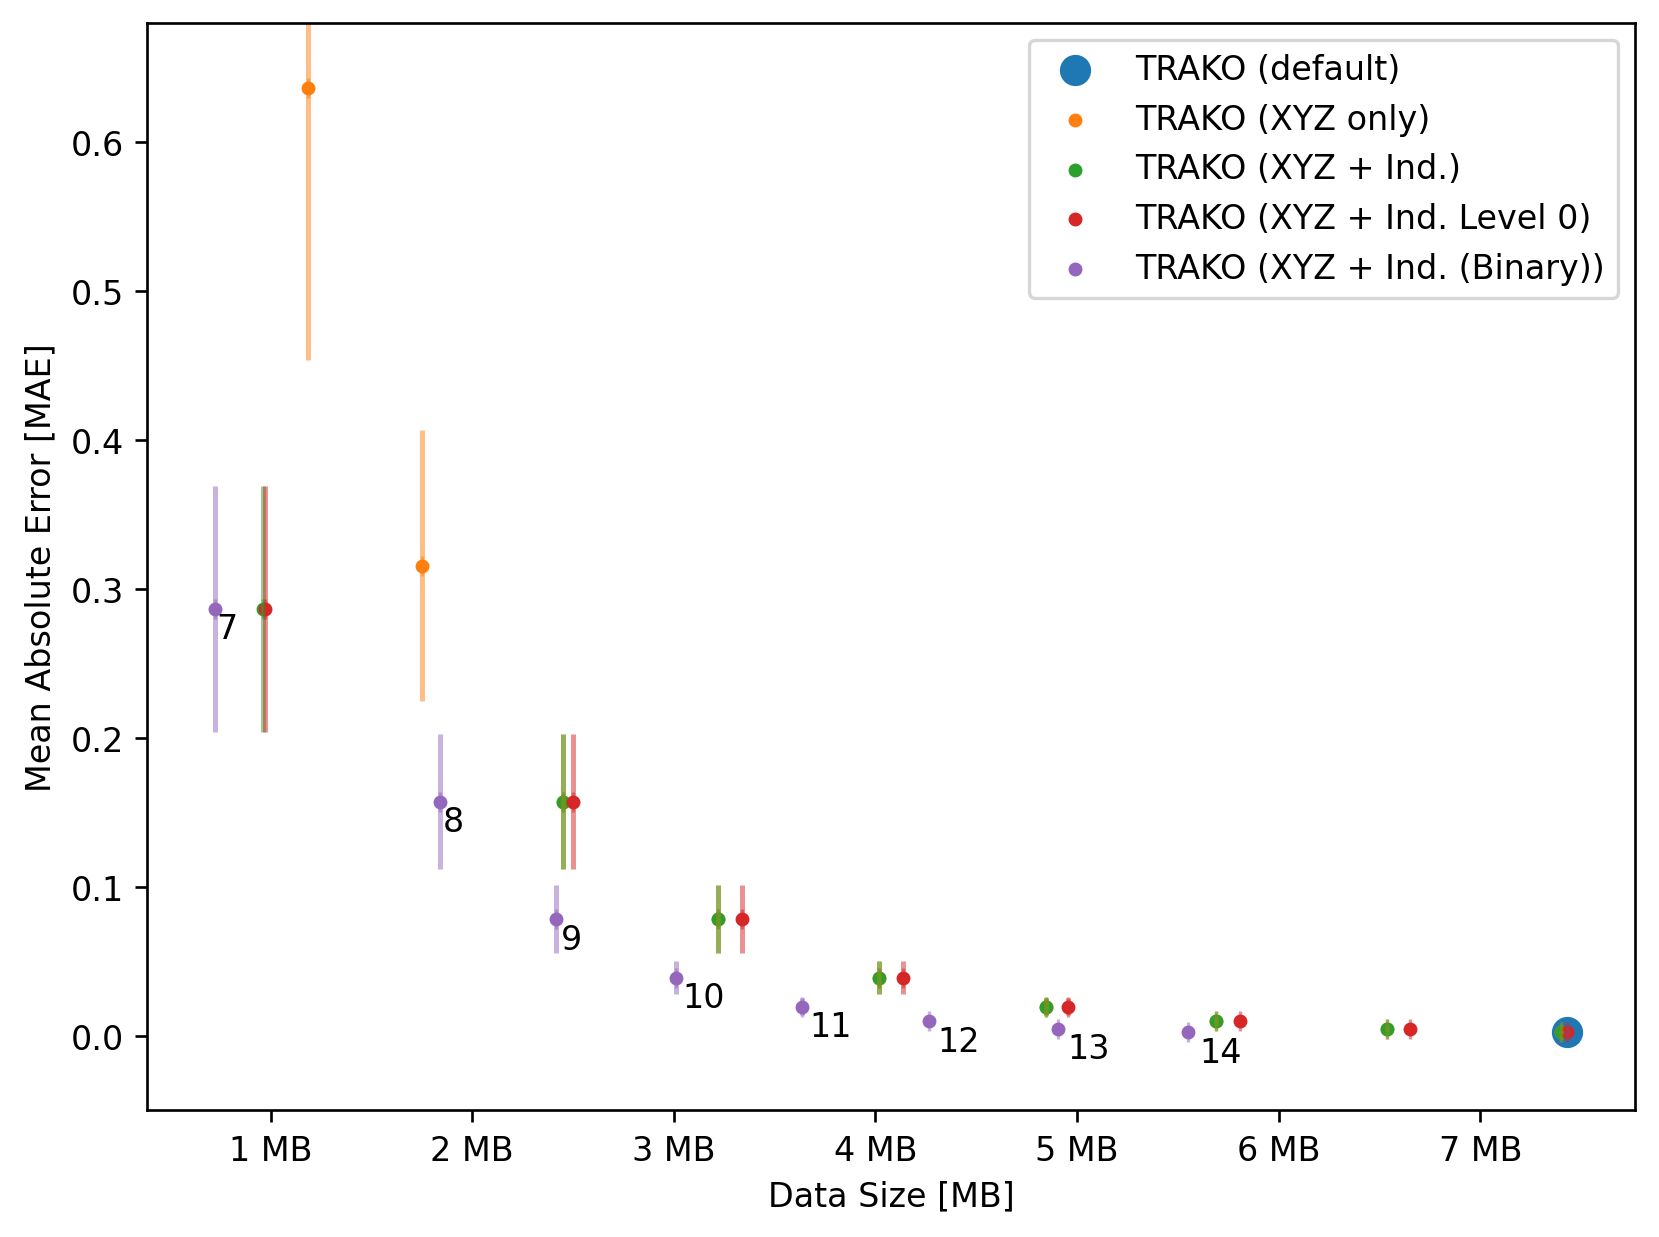

In [119]:
# sprinter.Sprinter.bitsplot(plt, tkoruns=runs, qfibruns=[qfib_sizes, qfib_errors, qfib_stds], ylim=(0,1), filename='/tmp/out.pdf')
sprinter.Sprinter.bitsplot(plt, tkoruns=runs, ylim=(-.05,.68), filename='/tmp/ISMRMbits.pdf')

In [120]:
print(input_size/1000000)

34.132073
